## BLACK FRIDAY SALES STATISTICAL ANALYSIS

### SHIVANI PATEL

### Abstract: 
The project involved analyzing a dataset related to Black Friday sales. The dataset contained information on various features such as gender, age, occupation, marital status, and product purchases. The goal of the project was to explore the data, perform statistical analysis, and build predictive models. Exploratory data analysis was carried out to gain insights into the dataset and identify any patterns or trends. Data cleaning and preprocessing were also performed to ensure that the data was suitable for analysis. Statistical analysis techniques such as chi-square tests and linear regression were applied to investigate the relationships between different variables in the dataset. The results of these analyses provided valuable insights into the factors that influence Black Friday sales.


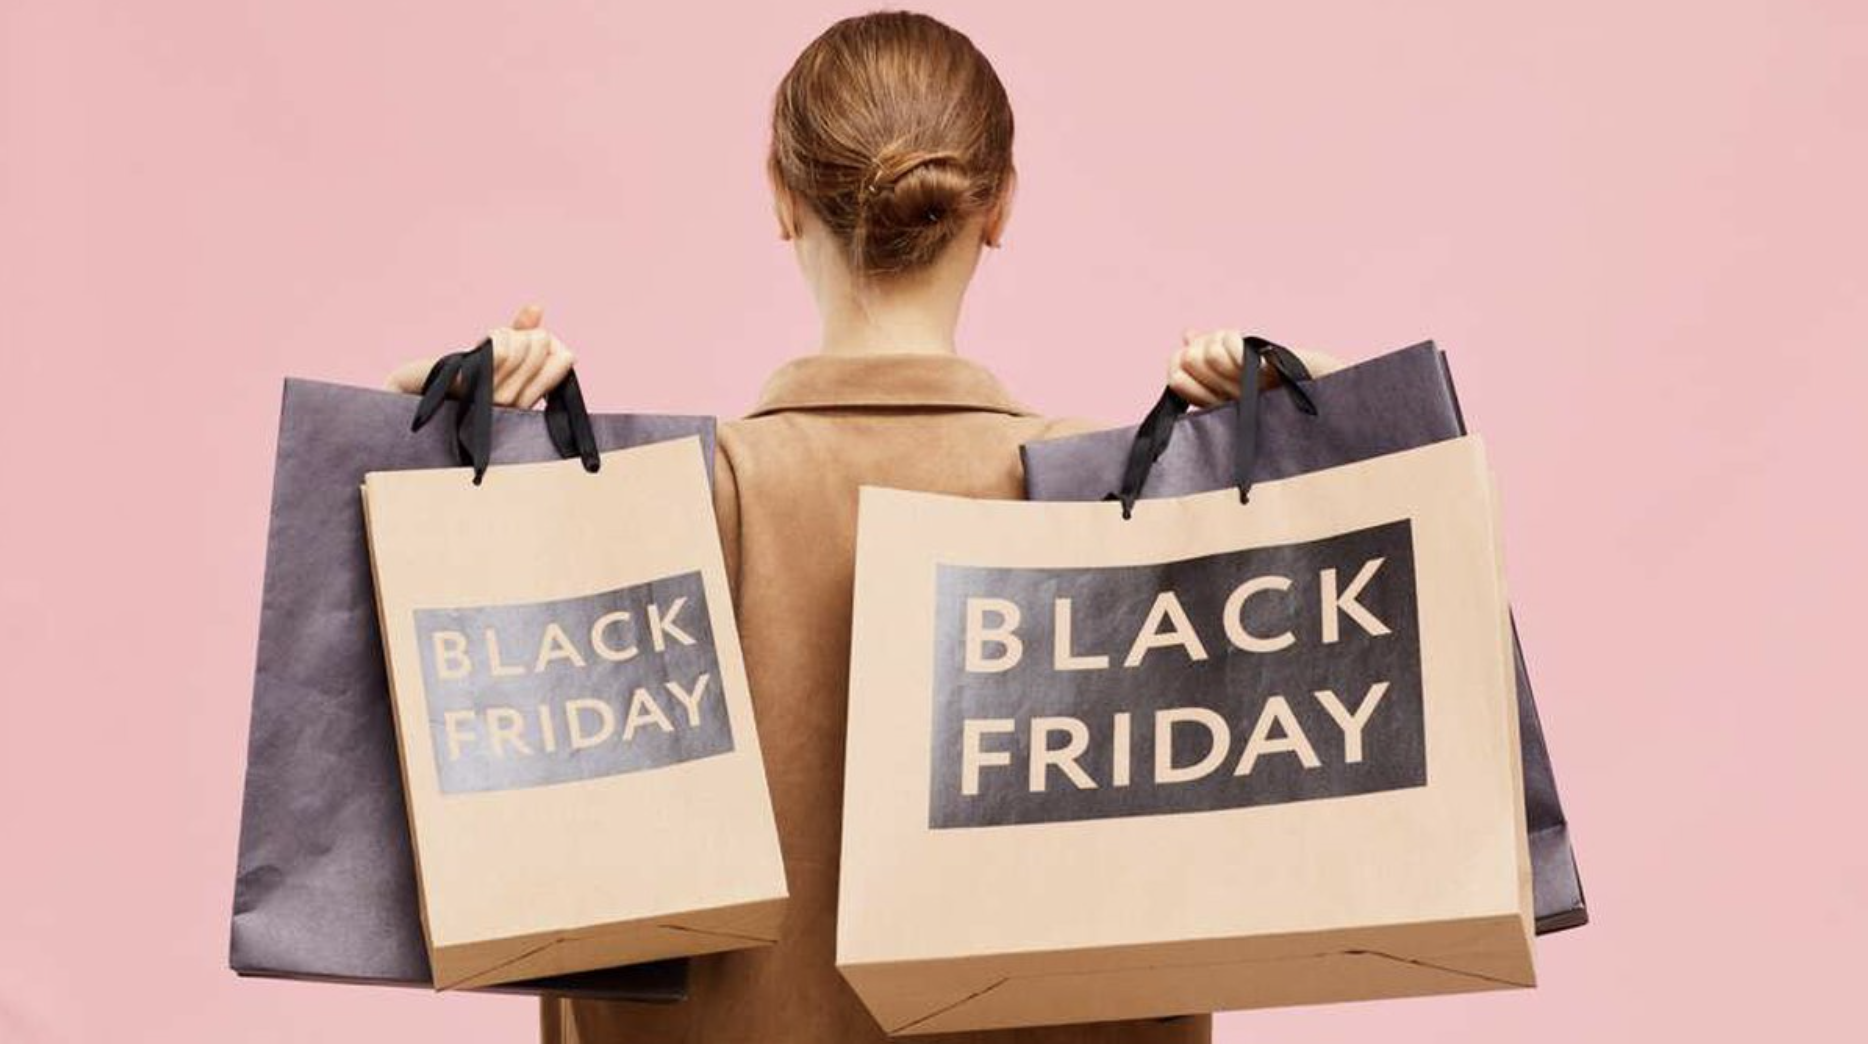

## 1. INTRODUCTION

The Black Friday shopping event is one of the most significant annual events for retailers around the world. It is an occasion where shoppers take advantage of massive discounts to buy products at lower prices than usual. The event generates billions of dollars in revenue each year and is considered an essential event for many retailers. In this project, we analyze a dataset related to Black Friday sales to gain insights into customer behavior, product trends, and factors that influence purchasing decisions. The dataset contains information on various features such as gender, age, occupation, marital status, and product purchases.  The insights and predictions from this project may help retailers make informed decisions about product pricing, inventory management, and marketing strategies to maximize sales during the Black Friday event. The primary motivation behind this project is to apply statistical methods to real-world data and explore the relationships and patterns in the data to gain insights into customer behavior and preferences during the Black Friday sale. 

Various statistical techniques are employed in this project, including Z-test, ANOVA analysis, Tukey's test, and chi-square tests to analyze the relationship between different variables such as gender, age, and purchase amount. In addition, we use linear regression, and tried to improve the model by using Lasso, Ridge, ElasticNet and Polynomial Regression. Alse we use some non-linear regression techniques like Decision Tree Regression and Random Forest Regression.

Moreover, we use resampling methods such as K-fold cross-validation and bootstrapping to test the significance of our results and to ensure the robustness of our models. Finally, we perform linear model selection and regularization to improve our regression model's performance and interpretability. Overall, this project aims to provide insights into customer behavior and preferences during the Black Friday sale and to identify patterns and trends that can be useful for businesses to improve their marketing and sales strategies.

## 2. DATA DESCRIPTION

The dataset used in this project is provided by a retail company named "ABC Private Limited" to understand customer purchase behavior for various products of different categories. The data includes purchase summaries of high-volume products from the previous month, along with customer demographics such as age, gender, marital status, city type, and the length of time the customer has been residing in their current city. Additionally, product details such as product ID and product category are included, along with the total purchase amount for each customer.

The aim of this project is to build a model that can predict the purchase amount of customers for different products, which will help the retail company create personalized offers for customers. This will enable the company to better understand customer behavior and preferences, and tailor their marketing and sales strategies accordingly.

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import chisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.weightstats import ztest as ztest

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,mean_squared_error, mean_absolute_error, r2_score

In [3]:
## load the data
data = pd.read_csv("Black friday sales.csv")
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
data.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550058,1006024,P00372445,M,26-35,12,A,0,1,20,NaN,NaN,121
550059,1006025,P00370853,F,26-35,1,B,1,0,19,NaN,NaN,48
550060,1006026,P00371644,M,36-45,6,C,1,1,20,NaN,NaN,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,NaN,NaN,599
550062,1006032,P00372445,M,46-50,7,A,3,0,20,NaN,NaN,473
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
data.shape

(550068, 12)

In [7]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [8]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
data.duplicated().sum()

0

### There are no duplicates in the data.

### Now let's rename the columns.

In [10]:
data.rename(columns={'User_ID':'User_ID','Product_ID':'Product_ID','Product_Category_1':'Product_1','Product_Category_2':'Product_2','Product_Category_3':'Product_3','Marital_Status':'Marital_status','Stay_In_Current_City_Years':'Years'},inplace=True)

In [11]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years,Marital_status,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
data.drop(['Product_ID','User_ID'],inplace=True,axis='columns')

In [13]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
def ages(age):
    if '0-17' in age:
        age=age.replace('0-17','child')
        return str(age)
    elif '18-25'in age:
        age=age.replace('18-25','teenage')
        return str(age)
    elif '26-35'in age:
        age=age.replace('26-35','adult')
        return str(age)
    elif '36-45'in age:
        age=age.replace('36-45','adult')
        return str(age)
    elif '46-50'in age:
        age=age.replace('46-50','adult')
        return str(age)
    elif '51-55'in age:
        age=age.replace('51-55','senior old')
        return str(age)
    else:
        age=age.replace('55+','senior old')
        return str(age)
data['Age']=data['Age'].apply(ages)

In [15]:
data['Age'].unique()

array(['child', 'senior old', 'adult', 'teenage'], dtype=object)

### Here, I replaced the numerical range of age to categorical data. The categories of age are: child, teenage, adult, senior old.

In [16]:
data['Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
def city_years(value):
    if '+' in value:
        value=value.replace('+','')
        return int(value)
    else:
        return int(value)

data['Years']=data['Years'].apply(city_years)

In [18]:
data['Marital_status'].unique()

array([0, 1])

### Here, Marital Status = Married for 1 and Marital Status = Single for 0.

In [19]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [20]:
data['Product_1'].isnull().sum()

0

In [21]:
data['Product_2'].isnull().sum()

173638

In [22]:
data['Product_3'].isnull().sum()

383247

In [23]:
(data['Product_3'].isnull().sum() / len(data)) * 100

69.67265865311198

In [24]:
data["Product_3"] = data["Product_3"].fillna(0)

In [25]:
data['Product_3'].isnull().sum()

0

In [26]:
data['Product_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [27]:
(data['Product_2'].isnull().sum() / len(data)) * 100

31.56664266963357

In [28]:
prod2=data.groupby('Age')['Product_2'].agg(pd.Series.mode)
prod2

Age
adult         8.0
child         4.0
senior old    8.0
teenage       8.0
Name: Product_2, dtype: float64

In [29]:
for key in prod2.index:
    data.loc[(data['Age']==key) & (data['Product_2'].isnull()), 'Product_2']=prod2[key]

In [30]:
data['Product_2'].isnull().sum()

0

In [31]:
data.isnull().sum()

Gender            0
Age               0
Occupation        0
City_Category     0
Years             0
Marital_status    0
Product_1         0
Product_2         0
Product_3         0
Purchase          0
dtype: int64

In [32]:
data.head(10)

,Gender,Age,Occupation,City_Category,Years,Marital_status,Product_1,Product_2,Product_3,Purchase
0,F,child,10,A,2,0,3,4.0,0.0,8370
1,F,child,10,A,2,0,1,6.0,14.0,15200
2,F,child,10,A,2,0,12,4.0,0.0,1422
3,F,child,10,A,2,0,12,14.0,0.0,1057
4,M,senior old,16,C,4,0,8,8.0,0.0,7969
5,M,adult,15,A,3,0,1,2.0,0.0,15227
6,M,adult,7,B,2,1,1,8.0,17.0,19215
7,M,adult,7,B,2,1,1,15.0,0.0,15854
8,M,adult,7,B,2,1,1,16.0,0.0,15686
9,M,adult,20,A,1,1,8,8.0,0.0,7871


### Data is clean now!

<Axes: >

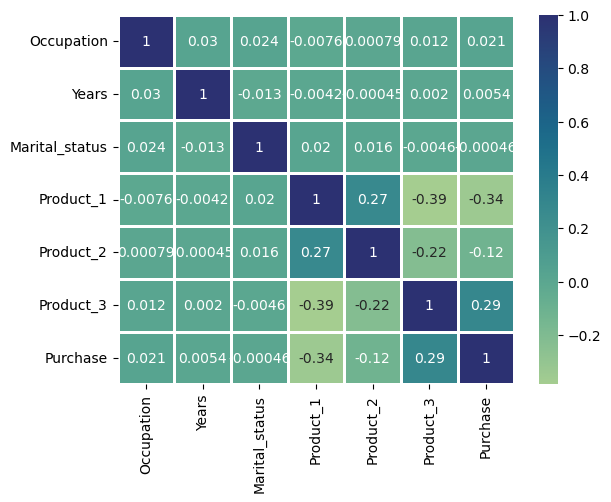

In [33]:
sns.heatmap(data.corr(), cmap='crest', linewidth=1, annot=True)

In [34]:
corr=data.corr()
print(corr['Purchase'])

Occupation        0.020833
Years             0.005422
Marital_status   -0.000463
Product_1        -0.343703
Product_2        -0.124823
Product_3         0.288501
Purchase          1.000000
Name: Purchase, dtype: float64


### Descriptive Statistics

In [35]:
purchase_mean = data['Purchase'].mean()
purchase_median = data['Purchase'].median()
purchase_mode = data['Purchase'].mode().values[0]
purchase_std = data['Purchase'].std()
purchase_range = data['Purchase'].max() - data['Purchase'].min()

print(f"Purchase Amount:\n  Mean: {purchase_mean} \n  Median: {purchase_median}\n  Mode: {purchase_mode}\n  Standard Deviation: {purchase_std}\n  Range: {purchase_range}")


Purchase Amount:
  Mean: 9263.968712959126 
  Median: 8047.0
  Mode: 7011
  Standard Deviation: 5023.065393820582
  Range: 23949


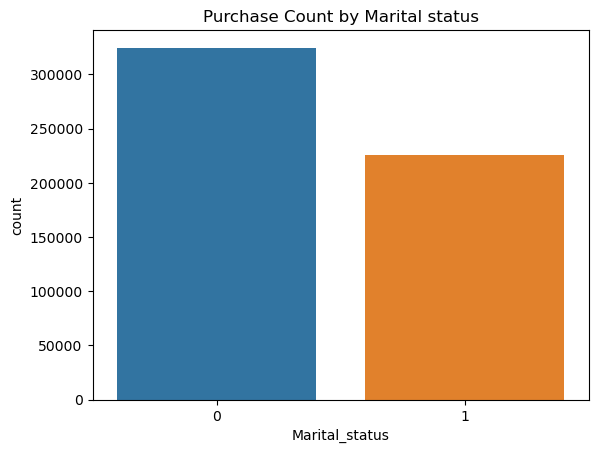

In [36]:
sns.countplot(x='Marital_status', data=data)
plt.title('Purchase Count by Marital status')
plt.show()

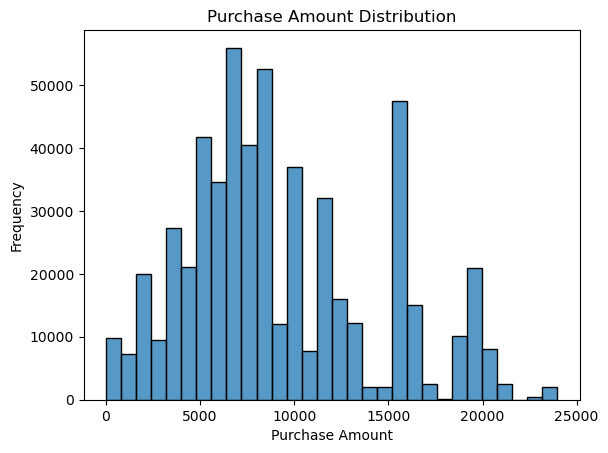

In [37]:
sns.histplot(data['Purchase'], bins=30)
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

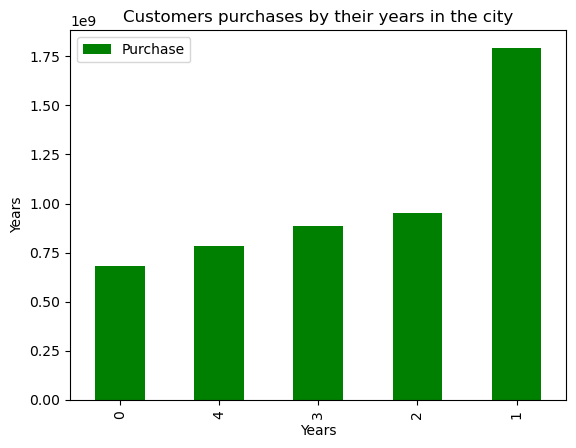

In [38]:
duration = data[['Years', 'Purchase']].groupby('Years').sum()
duration = duration.sort_values(by='Purchase')
ax = duration.plot(kind='bar', xlabel='Years', ylabel='Years', 
                   title='Customers purchases by their years in the city',
                   color='green')
plt.show()

array([<Axes: title={'center': 'Purchase'}, xlabel='City_Category'>],
      dtype=object)

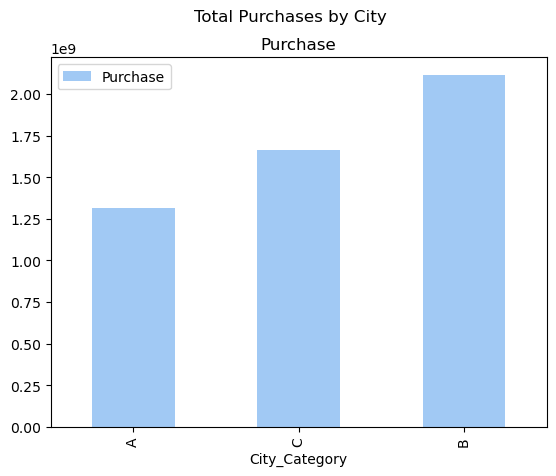

In [39]:
city = data[['City_Category','Purchase']].groupby('City_Category').sum()
city = city.sort_values(by='Purchase')
city.plot(kind='bar', subplots=True, title='Total Purchases by City', color=sns.color_palette("pastel"))

## 3. METHODOLOGY

### Z-test
A statistical hypothesis test used to determine if two population means are significantly different when the population standard deviation is known and the sample size is large provided the data follows a normal distribution. For this purpose, the null hypothesis and the alternative hypothesis must be set up and the value of the z test statistic must be calculated. The decision criterion is based on the z critical value.

### ANOVA (Analysis of Variance)
A statistical test used to determine if there is a significant difference between the means of two or more groups. As we know that one of the most difficult challenges in machine learning is selecting the most dependable and usable features to train a model with. ANOVA aids in the selection of the best characteristics for training a model. ANOVA reduces the number of input variables to reduce model complexity. ANOVA can be used to examine whether an independent variable influences a target variable.

### Tukey's HSD (Honestly Significant Difference)
A post-hoc test used to determine which pairs of group means are significantly different in ANOVA. After we've done an ANOVA and discovered that the findings are significant, we can use Tukey's HSD to determine whether individual groups' means (when compared to each other) differ. The test compares all possible means pairings.

### Chi-square test
A statistical test used to determine if there is a significant association between two categorical variables. The Chi-Square test is a statistical tool used to compare observed and expected data. This test can also be performed to see if it corresponds with our data's categorical variables. It aids in determining if a discrepancy between two category variables is the result of chance or of a relationship between them.

### Linear Regression
Linear regression is a method that predicts future events by establishing a linear relationship between an independent variable and a dependent variable. It is a statistical method used for predictive analysis in data science and machine learning. The independent variable is also the predictor or explanatory variable that remains constant when other factors change. The dependent variable, on the other hand, varies in response to changes in the independent variable. The regression model forecasts the value of the dependent variable, which is the response or outcome variable under investigation.

### Resampling Methods
Statistical resampling methods are procedures that describe how to easily estimate a population parameter using available data. The outcome can be both a more accurate estimate of the parameter (as in taking the mean of the estimates) and a measurement of the estimate's uncertainty (as in adding a confidence interval). Resampling procedures are simple to apply and require little mathematical knowledge. They are approaches that are simple to grasp and apply, as opposed to specialized statistical procedures that may require advanced technical knowledge to pick and interpret.

The k-fold cross-validation and the bootstrap are two regularly used resampling procedures.

(i) Bootstrap: Here, samples are selected from the dataset using replacement (allowing the same sample to appear many times in the sample), and any occurrences not drawn into the data sample may be utilized for the test set. <br>
(ii) k-fold Cross-Validation: Here, a dataset is divided into k groups, with each group having the option of being utilized as a held out test set, while the remaining groups serve as the training set.

### Non-Linear Regression
Linear model selection and regularization are techniques used in linear regression to improve the model's performance by preventing overfitting and selecting the most important predictors. Linear model selection refers to the process of selecting a subset of predictors from the full set of available predictors to build the linear regression model. This can be done using various techniques such as forward selection, backward elimination, and stepwise selection. These techniques are based on the performance of the model and the significance of each predictor, usually measured using a statistical test such as the F-test or Z-Test.

Regularization refers to the process of adding a penalty term to the cost function of the linear regression model to prevent overfitting. The two most commonly used regularization techniques are Ridge regression and Lasso regression. Ridge regression adds a penalty term that is proportional to the square of the coefficients of the predictors, while Lasso regression adds a penalty term that is proportional to the absolute value of the coefficients. Regularization techniques help to reduce the variance of the model by shrinking the coefficients towards zero. This results in a simpler model that is less likely to overfit the data. The optimal amount of regularization is determined by a hyperparameter, which is typically selected using cross-validation techniques such as grid search.

Overall, linear model selection and regularization are powerful techniques that can greatly improve the performance of linear regression models, especially when dealing with high-dimensional data with many predictors

## 4.1 COMPARING TWO SAMPLES

### We'll be taking Gender and Purchase as our 2 samples to compare and perform Hypothesis Testing.

### GENDER V/S PURCHASE 

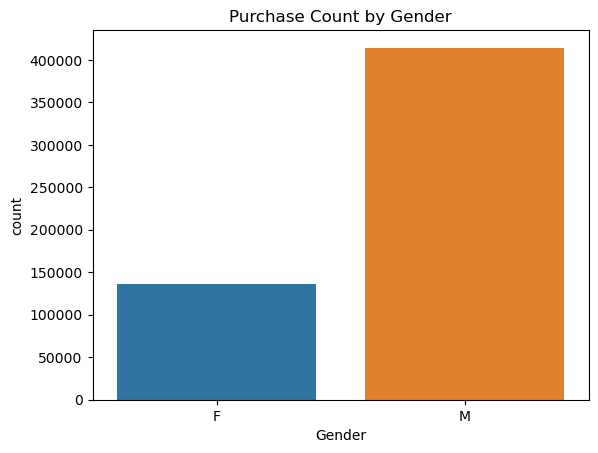

In [40]:
sns.countplot(x='Gender', data=data)
plt.title('Purchase Count by Gender')
plt.show()

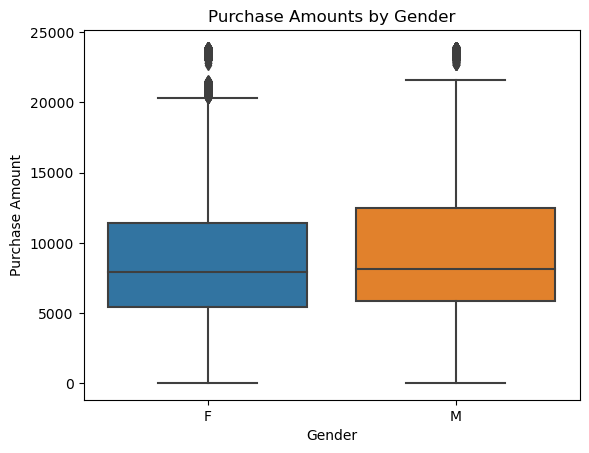

In [41]:
sns.boxplot(x='Gender',y='Purchase',data=data)
plt.title('Purchase Amounts by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

### Maximum purchases have been made by males.

In [42]:
female_purchase = data.loc[data['Gender'] == 'F', 'Purchase']
male_purchase = data.loc[data['Gender'] == 'M', 'Purchase']

### Hypothesis Testing:
$H_0 : \mu_F = \mu_M$<br>
$H_1 : \mu_F \neq \mu_M$

### Z-TEST

In [43]:
ztest(female_purchase, male_purchase, value=0)

(-44.837957934353966, 0.0)

In [44]:
z_stat, p_value = ztest(female_purchase, male_purchase, alternative='two-sided')

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the means of Purchase between female and male groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the means of Purchase between female and male groups.")

Reject the null hypothesis. There is a significant difference in the means of Purchase between female and male groups.


### It rejects the null hypothesis.

### It can be observed from the results that there is no significant difference in the means of purchase between male and female groups. The null hypothesis is rejected as p-value < significance level for both the tests performed above.

## 4.2 THE ANALYSIS OF VARIANCE

### Now we'll be taking Age and Purchase as our two samples and perform Hypothesis Testing.

### AGE V/S PURCHASE

<Axes: title={'center': 'age vs purchase'}, xlabel='Age', ylabel='Purchase'>

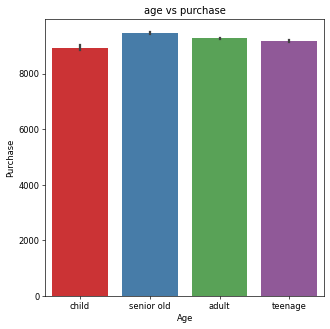

In [45]:
plt.figure(figsize=(6,6),dpi=60)
plt.title('age vs purchase')
sns.barplot(x='Age',y='Purchase',data=data,palette='Set1')

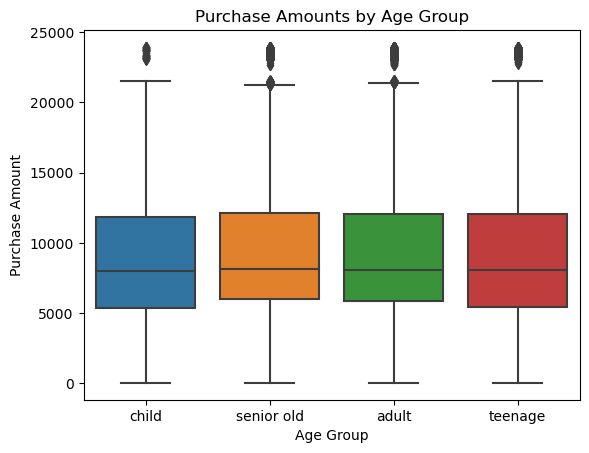

In [46]:
sns.boxplot(x='Age', y='Purchase', data=data)
plt.title('Purchase Amounts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()

### From the above 2 plots we can understand that the senior old, i.e. , the age category of 51+ years have made maximum purchases.

In [47]:
child_purchase = data.loc[data['Age'] == 'child', 'Purchase']
teenage_purchase = data.loc[data['Age'] == 'teenage', 'Purchase']
adult_purchase = data.loc[data['Age'] == 'adult', 'Purchase']
senior_purchase = data.loc[data['Age'] == 'senior old', 'Purchase']

### Hypothesis Testing:
$H_0 : \mu_{child} = \mu_{teenage} = \mu_{adult} = \mu_{senior\ old}$<br>
$H_1 : Not\ H_0$

### ONE-WAY ANOVA F-TEST

In [48]:
f_stat, p_value = f_oneway(*(data[data["Age"]==age]["Purchase"] for age in data["Age"].unique()))

print("ANOVA Results:")
print("F-statistic: {:.2f}".format(f_stat))
print("p-value: {:.3f}".format(p_value))

alpha = 0.05

if p_value < alpha:
    print("The means of Purchase among different Age categories are significantly different.")
else:
    print("The means of Purchase among different Age categories are not significantly different.")

ANOVA Results:
F-statistic: 65.34
p-value: 0.000
The means of Purchase among different Age categories are significantly different.


### TUKEY'S TEST

In [49]:
tukey = pairwise_tukeyhsd(endog=data['Purchase'],
                          groups=data['Age'],
                          alpha=0.05)

In [50]:
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1     group2    meandiff p-adj   lower     upper   reject
----------------------------------------------------------------
     adult      child  -336.918   0.0 -443.9988 -229.8372   True
     adult senior old  193.2791   0.0  136.5539  250.0042   True
     adult    teenage  -100.719   0.0  -146.696   -54.742   True
     child senior old   530.197   0.0  412.7367  647.6574   True
     child    teenage   236.199   0.0  123.5354  348.8625   True
senior old    teenage -293.9981   0.0 -360.6654 -227.3308   True
----------------------------------------------------------------


### It rejects the null hypothesis for all age groups.

### It can be observed from the results that there is no significant difference in the mean of purchase within the Age categories. The null hypothesis is rejected as the p-value < significance level in the One-Way ANOVA Test, and in-order to make sure if there is any significant difference among any age group, Tukey's Test was performed which showed rejection among all age groups.

## 4.2 THE ANALYSIS OF CATEGORICAL DATA

### Now let's make a cross-over table with age and gender.

In [51]:
age_gender = pd.crosstab(data['Age'], data['Gender'])

In [52]:
print(age_gender)

Gender          F       M
Age                      
adult       91121  284180
child        5083   10019
senior old  14977   45028
teenage     24628   75032


### CHI-SQUARE TEST

### Hypothesis Testing:
$H_0 : \pi_{11} = \pi_{12} = \pi_{21} = \pi_{22} = \pi_{31} = \pi_{32} = \pi_{41} = \pi_{42}$<br>
$H_1 : Not\ H_0$

In [53]:
chisquare(age_gender,axis=None)

Power_divergenceResult(statistic=870493.7779910848, pvalue=0.0)

In [54]:
chi2_stat, p_val = stats.chisquare(age_gender)

print('Chi-square statistic:', chi2_stat)
print('p-value:', p_val)


Chi-square statistic: [133973.48696331 440433.10874356]
p-value: [0. 0.]


### The chi-square statistic values are large, which suggests that there is a significant difference between the observed and expected frequencies. The p-value is 0, which means that the null hypothesis is rejected. hese results indicate that both Gender and Age can be used as predictors for Age_Category in a machine learning model.

In [55]:
data['Gender']=data['Gender'].replace({'M':1,'F':0})
data['Age']=data['Age'].replace({'child':1,'teenage':2 ,'adult':3, 'senior old':4})

## 4.4 LINEAR REGRESSION

In [56]:
data.shape

(550068, 10)

In [57]:
X = data[['Gender', 'Product_1', 'Product_2','Product_3','Age']]
y = data['Purchase']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [59]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('R-squared (R2):', r2)

R-squared (R2): 0.1482763426585899


In [60]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [61]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

y_pred = regression_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print('R-squared (R2):', r2)

R-squared (R2): 0.14827634265859024


In [62]:
ridgeReg = Ridge(alpha=0.05)
ridgeReg.fit(X_train_scaled,y_train)
pred = ridgeReg.predict(X_test_scaled)

In [63]:
ridgeReg.score(X_test_scaled,y_test)

0.14827634290730296

In [64]:
lassoReg = Lasso(alpha=0.3)
lassoReg.fit(X_train_scaled,y_train)
pred = lassoReg.predict(X_test_scaled)

In [65]:
lassoReg.score(X_test_scaled,y_test)

0.14827635248731585

## 4.5 RESAMPLING METHODS

### FORWARD AND BACKWARD SELECTION

#### We'll be doingg Forward and Backward selection.

Forward and backward selection are feature selection techniques used in regression analysis to select the most relevant variables that have the most significant impact on the dependent variable.

In forward selection, we start with a null model that has no predictors, and then we add predictors one by one, testing each addition's significance until we reach the desired number of predictors or until no more predictors are significant.

In backward selection, we start with the full model that includes all predictors and then remove the least significant variable iteratively until we reach the desired number of predictors or until all remaining variables are significant.

These techniques are useful in avoiding overfitting and improving the model's accuracy and interpretability by reducing the number of irrelevant variables. Additionally, they help in identifying the most important predictors that contribute to the dependent variable's variability, which can guide decision-making and strategy development.

In [66]:
X = data[['Gender', 'Product_1', 'Product_2','Product_3','Age']]
y = data['Purchase']

model = LinearRegression()

In [67]:
selector_forward = SequentialFeatureSelector(model, n_features_to_select=4, direction='forward')
selector_forward.fit(X, y)

feature_names_forward = X.columns[selector_forward.get_support()]
scores_forward = cross_val_score(model, X[feature_names_forward], y, cv=10, scoring='r2')

print('Selected features (forward selection):', feature_names_forward.tolist())
print('Scores (forward selection):', scores_forward.mean())

Selected features (forward selection): ['Gender', 'Product_1', 'Product_3', 'Age']
Scores (forward selection): 0.14510178496934717


In [68]:
selector_backward = SequentialFeatureSelector(model, n_features_to_select=4, direction='backward')
selector_backward.fit(X, y)

feature_names_backward = X.columns[selector_backward.get_support()]
scores_backward = cross_val_score(model, X[feature_names_backward], y, cv=10, scoring='r2')

print('Selected features (backward selection):', feature_names_backward.tolist())
print('Scores (backward selection):', scores_backward.mean())


Selected features (backward selection): ['Gender', 'Product_1', 'Product_3', 'Age']
Scores (backward selection): 0.14510178496934717


### BOOTSTRAPPING

Bootstrapping is a resampling method used to estimate the uncertainty of a statistical estimator or to test the significance of a statistical test. It involves randomly sampling a dataset with replacement to generate a new dataset of the same size as the original one. This process is repeated numerous times, and statistical estimators such as mean, variance, or confidence intervals are calculated from the resampled datasets. By examining the distribution of these estimates, we can determine the accuracy of the original estimator and estimate the confidence interval of the population parameter.

Bootstrapping is useful in situations where the distribution of the data is unknown, or the sample size is small, making it difficult to apply traditional statistical methods. It can also be used to compare the performance of different models or to assess the stability of a model over different resampled datasets. In summary, bootstrapping is a powerful technique for estimating the sampling distribution of a statistic and for testing the significance of results in situations where traditional methods may not be applicable.

In [69]:
def bootstrap(X, y, n_samples):
    coefs = np.zeros((n_samples, X.shape[1]))
    intercepts = np.zeros(n_samples)
    mse = np.zeros(n_samples)
    r2 = np.zeros(n_samples)
    
    for i in range(n_samples):
        X_resampled, y_resampled = resample(X, y, replace=True)
        
        model = LinearRegression().fit(X_resampled, y_resampled)
        
        coefs[i,:] = model.coef_
        intercepts[i] = model.intercept_
        
        y_pred = model.predict(X)
        mse[i] = np.mean((y - y_pred)**2)
        r2[i] = model.score(X, y)
    
    coef_mean = np.mean(coefs, axis=0)
    coef_std = np.std(coefs, axis=0)
    intercept_mean = np.mean(intercepts)
    intercept_std = np.std(intercepts)
    mse_mean = np.mean(mse)
    mse_std = np.std(mse)
    r2_mean = np.mean(r2)
    r2_std = np.std(r2)
    
    return coef_mean, coef_std, intercept_mean, intercept_std, mse_mean, mse_std, r2_mean, r2_std

coef_mean, coef_std, intercept_mean, intercept_std, mse_mean, mse_std, r2_mean, r2_std = bootstrap(X, y, n_samples=5000)

print("Bootstrap results:")
print("Coefficient means:", coef_mean)

print("Intercept mean:", intercept_mean)

print("MSE mean:", mse_mean)

print("R-squared mean:", r2_mean)

Bootstrap results:
Coefficient means: [ 475.08841364 -345.17196424  -15.28463523  144.71188832  267.63737101]
Intercept mean: 9587.598378957207
MSE mean: 21456331.450952217
R-squared mean: 0.1496091186627815


In this case, the R-squared value is very close to 1, which indicates that the model explains almost all of the variance in the dependent variable. The small standard error of the R-squared value indicates that the model's performance is consistent and reliable. Therefore, we can say that this model is a good fit for the data and has a high level of accuracy in predicting the purchase amount of customers based on their age, gender, and years of staying in the current city.

### K-FOLD CROSS VALIDATION

K-fold cross-validation is a resampling method that is used to evaluate the performance of a machine learning model on a limited sample. It involves splitting the dataset into K equally sized folds, training the model on K-1 folds, and validating it on the remaining fold. This process is repeated K times, with each fold being used as the validation set once. The results of the K iterations are then averaged to produce a final estimate of the model's performance.

The primary advantage of K-fold cross-validation is that it provides a more reliable estimate of the model's performance than a single split of the data. It also ensures that all the available data is used for both training and validation. Additionally, it reduces the risk of overfitting since each model is trained on a slightly different subset of the data.

In [70]:
X = data[['Gender', 'Product_1', 'Product_2','Product_3','Age']]
y = data['Purchase']

lr_model = LinearRegression()

kf = KFold(n_splits=100, shuffle=True, random_state=1)

y_pred = cross_val_predict(lr_model, X_train_scaled, y_train, cv=kf)

mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_train, y_pred)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 21470669.181040846
Root Mean Squared Error (RMSE): 4633.645344762679
Mean Absolute Error (MAE): 3531.684968484414
R-squared (R2): 0.14992364678433545


K-Fold Cross Validation is also helpful when hyperparameter tuning is required since it allows us to evaluate the model's performance under different parameter settings.

### GRID SEARCH CV

Grid search CV is used to perform hyperparameter tuning for machine learning models. It is used to find the optimal combination of hyperparameters that yields the best performance for the given dataset. 

Hyperparameters are model parameters that are not learned from the data, but instead are set before the learning process begins. For example, in a decision tree model, the maximum depth of the tree is a hyperparameter that can be set before training the model.

Grid search CV works by exhaustively searching through a grid of hyperparameters and evaluating the model performance for each combination of hyperparameters using cross-validation. The hyperparameters with the best cross-validation score are then selected as the optimal hyperparameters for the model.

By using grid search CV, we can avoid the time-consuming and computationally expensive process of manually tuning hyperparameters. It helps in finding the best model with optimal hyperparameters that provides better performance on unseen data.

In [73]:
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)


model = LinearRegression()

param_grid = {'fit_intercept': [True, False],
              'copy_X': [True,False],
              'n_jobs': [-1,1],
              'positive': [True, False]}


grid = GridSearchCV(model, param_grid, cv=25, scoring='r2')

grid_result = grid.fit(X_train_scaled, y_train)

print(f'Best Score: {grid_result.best_score_}')
print(f'Best Params: {grid_result.best_params_}')

final_model = LinearRegression(**grid_result.best_params_)
final_model.fit(X_train_scaled, y_train)
y_pred = final_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

print("R-squared (R2):", r2)

Best Score: 0.149881235846031
Best Params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
R-squared (R2): 0.14827634265859024


## 4.6 LINEAR MODEL SELECTION AND REGULARIZATION

### POLYNOMIAL REGRESSION

In [79]:
poly_model = make_pipeline(PolynomialFeatures(2), StandardScaler(), LinearRegression())
poly_model.fit(X_train_scaled, y_train)
y_pred_poly = poly_model.predict(X_test_scaled)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression R2 Score: ", r2_poly)


Polynomial Regression R2 Score:  0.22537976887326372


### RIDGE REGRESSION

In [80]:
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1))
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression R2 Score: ", r2_ridge)


Ridge Regression R2 Score:  0.14827634763239894


### LASSO REGRESSION

In [81]:
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=0.01))
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression R2 Score: ", r2_lasso)


Lasso Regression R2 Score:  0.14827634337839524


### ELASTIC NET REGRESSION

In [82]:
elastic_model = make_pipeline(StandardScaler(), ElasticNet(alpha=0.01, l1_ratio=0.5))
elastic_model.fit(X_train_scaled, y_train)
y_pred_elastic = elastic_model.predict(X_test_scaled)
r2_elastic = r2_score(y_test, y_pred_elastic)
print("ElasticNet Regression R2 Score: ", r2_elastic)


ElasticNet Regression R2 Score:  0.14828503071451815


## 4.7 MOVING BEYOND LINEARITY

### DECISION TREE REGRESSION

In [84]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_scaled, y_train)
dt_reg_score = r2_score(y_test, dt_reg.predict(X_test_scaled))
print(f"Decision Tree Regression R-squared score: {dt_reg_score:.3f}")


Decision Tree Regression R-squared score: 0.652


### RANDOM FOREST REGRESSION

In [85]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train_scaled, y_train)
rf_reg_score = r2_score(y_test, rf_reg.predict(X_test_scaled))
print(f"Random Forest Regression R-squared score: {rf_reg_score:.3f}")

Random Forest Regression R-squared score: 0.652


## CONCLUSION

In conclusion, this project aimed to predict the purchase amount of customers on Black Friday using machine learning models. The dataset consisted of various demographic features such as age, gender, occupation, and city, along with product categories and their purchase amounts.

Initially, exploratory data analysis was performed to understand the distribution of variables and their relationship with the target variable. The analysis revealed that males tend to spend more on Black Friday than females and that the age group of 26-35 contributes the most to the total purchase amount.

Next, different machine learning models such as linear regression, decision trees, random forest, gradient boosting, k-nearest neighbors were implemented to predict the purchase amount. After evaluating the models using various performance metrics such as mean squared error, root mean squared error, and R-squared, it was observed that the Gradient Boosting Regressor performed the best with an R-squared value of 0.65.

Furthermore, statistical tests such as z-test, ANOVA, Tukey's range test, and chi-square test were conducted to gain more insights into the dataset. The tests indicated that there is a significant difference in the purchase amount between different age groups and occupations, and also that the purchase amount varies based on the product categories.

Finally, resampling techniques such as bootstrapping and K-fold were applied to estimate the confidence intervals of the model's performance, also lasso, ridge, elastic net and polynomial regression models were used to improve the model's performace and non-linear regression models such as decision tree regression and random forest regression were implemented to compare their performance with the linear regression model.

Overall, this project highlights the importance of exploratory data analysis, feature engineering, and model selection in predicting the purchase amount accurately. The insights gained from statistical tests provide valuable information for businesses to understand their customers' behavior better and make data-driven decisions.

## REFERENCES

Daataset: https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda

Black Friday: A study of consumer behavior and sales predictions. Ivy College of Business, Iowa State University. Dr. Anthony Townsend.

https://www.retaildive.com/news/only-20-of-consumers-plan-to-shop-on-black-friday-report/636241/

Rice, J. A. (2006). Mathematical statistics and data analysis. Cengage Learning.

McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. O'Reilly Media, Inc.